<a href="https://colab.research.google.com/github/josep29/josep29/blob/main/Simple_linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparació entre un model matemàtic i una xarxa neuronal en el camp de la regressió lineal

Activitat realitzada per:
* Josep Picanyol 

En aquesta activitat, adjunta al projecte TDR, és usada per a observar el comportament d'una XNA envers a un model matemàtic

## Importació de les llibreries utilitzades:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

## Creació de les dades 
Es crea un *dataframe* segons l'equació: e: 5x+5 amb una variança de x entre `[-50, 50]`

In [2]:
o = 100
d = np.random.uniform(-50, 50, (o, 1))

for i in range(o):
  data1 = np.array([[i, (5*i + 5 + d[i][0])]])
  if i == 0:
    data = data1
  else:
    data = np.concatenate((data, data1))

lineardf = pd.DataFrame(data, columns=['X', 'Y'])

Definició de la variable dependent i independent

In [3]:
X1 = lineardf.copy().pop('X')
Y = lineardf.pop('Y') 
X = lineardf

X1 = np.array(X1)
X = np.array(X)
Y = np.array(Y)

Xmean = np.mean(X)
Ymean = np.mean(Y)

### Model Matemàtic

Càlcul del pendent (m) i la intersecció (n),
segons la formula de l'equació lineal:\
`y = mx + n`

In [4]:
l = len(X)

numcorr = 0
xsquare = 0
ysquare = 0
numsx = 0
numsy = 0


for i in range(l):
  numcorr += (X[i][0] - Xmean) * (Y[i] - Ymean)
  xsquare += pow(X[i][0] - Xmean, 2)
  ysquare += pow(Y[i] - Ymean, 2)
  numsx += pow(X[i] - Xmean, 2)
  numsy += pow(Y[i] - Ymean, 2)

r = numcorr/sqrt(xsquare*ysquare)
m = r*(sqrt(numsy/(l - 1))/sqrt(numsx/(l - 1)))
n = Ymean - Xmean * m

print('La taula correspon a la funció f(X) = {:.2f}x +  {:.2f}'.format(m, n))

La taula correspon a la funció f(X) = 5.11x +  -1.50


Representació gràfica dels resultats

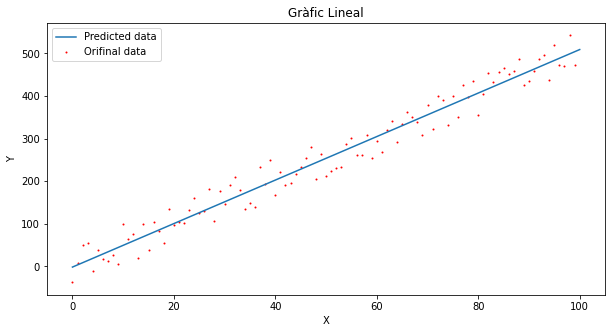

In [5]:
x = np.linspace(0, o, 2)
y = m*x + n
 
fig = plt.figure(figsize = (10, 5))

plt.scatter(X, Y, s=1, label='Orifinal data', c='r')
plt.plot(x, y, label='Predicted data')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Gràfic Lineal")

plt.show()

### Model Xarxa neuronal artificial

Importació de les llibreries:

In [6]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

Creació i compilació del model linear

In [7]:
lmodel = tf.keras.Sequential([
    layers.Input((1)),
    layers.Dense(1, activation='linear')
])
optimizer=SGD(learning_rate=0.000002, momentum=0.5)
lmodel.compile(optimizer=optimizer, loss='mean_squared_error')

Entrenament del model

In [ ]:
history = lmodel.fit(X, Y, epochs=100, verbose=0)

Visualització de les pèrdues

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='loss')

plt.title('Linear Model Loss')
plt.xlabel('Epoch')
plt.legend()

Obtenció del pendent (m) i la intersecció (n)

In [ ]:
m = lmodel.layers[0].get_weights()[0]
n = lmodel.layers[0].get_weights()[1]
p = m[0][0]*x + n[0]
print(f'e: {str(round(m[0][0], 2))}x + {str(round(n[0], 2))}')

Representació gràfica dels resultats

In [ ]:
fig = plt.figure(figsize=(10, 5))

plt.plot(X, lmodel.predict(X1), label='Predicted data')
plt.scatter(X, Y, label='Original data', s=1, c='r')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Conclusió
Es pot observar que per a fer regressió linear és més eficient el model Matemàtic. Podem observar que el model de la XNA no es tant eficient degut a que segurament es necessari un *dataframe* més extens, també degut a que els perametres especificats no són els més accurats. 

Podem concloure que el model matemàtic uzat només és útil per a fer la regressió de equacions lineals, ja que amb altres tipologies de equacions aquest model no seria eficient. d'igual manera el model de la XNA no seria eficient en l'ús d'altres tipus d'equacions a no ser que es modifiques la capa d'entrades, així adaptant al tipus de equació.